### Machine Learning Notebook

Dataset contains 22 predictor variables, and balanced number of records for benign, malicious and phishing urls.

Outline
1. Selecting a Data Set and Model
2. Random Forest Parameter Tuning
3. Final Random Forest Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

C:\Users\pablo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 1. Model Selection

#### Multiple Classifiers with Imbalanced Data Sets

First I run through multiple algorthims using an imbalanced data set.

In [3]:
df = pd.read_pickle('capstone2_balanced_final')

In [4]:
df_model = df
#fill avg_path_token_len nans with 0s
df_model.avg_path_token_len = df_model.avg_path_token_len.fillna(0)

In [5]:
df_model = df_model.loc[:,['category', 'pc_domain_spec', 'pc_netloc_num', 'n_domain_suffix', 'n_domain_tok', 'pc_num', 'domain_entropy','path_entropy', 'netloc_entropy', 'pc_domain_num', 'n_netloc_tok', 'is_top500_domain', 'pc_uppercase', 'avg_path_token_len', 'pc_spec', 'longest_path_len', 'pc_path_uppercase', 'pc_netloc_spec', 'len_all_paths', 'len_domain', 'len_netloc', 'pc_path_num', 'entropy']]

In [ ]:
df_model.info()

In [6]:
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

  
# X -> features, y -> label 
X = df_model.drop(['category'], axis=1)
y = df_model['category']
  
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

KNeighborsClassifier
****Results****
Accuracy: 81.8133%
Log Loss: 1.87484735747912
Confusion matrix, without normalization
[[2196  132  160]
 [ 263 1987  270]
 [ 321  218 1953]]
Normalized confusion matrix
[[0.88263666 0.05305466 0.06430868]
 [0.10436508 0.78849206 0.10714286]
 [0.1288122  0.08747994 0.78370787]]


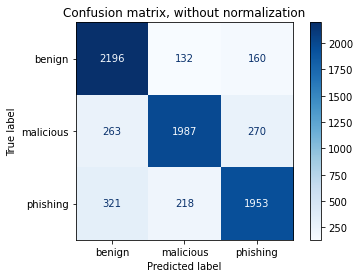

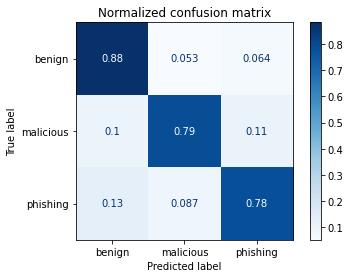

DecisionTreeClassifier
****Results****
Accuracy: 87.2267%
Log Loss: 4.411845457800668
Confusion matrix, without normalization
[[2275   86  127]
 [ 104 2167  249]
 [ 138  254 2100]]
Normalized confusion matrix
[[0.91438907 0.03456592 0.05104502]
 [0.04126984 0.85992063 0.09880952]
 [0.05537721 0.10192616 0.84269663]]


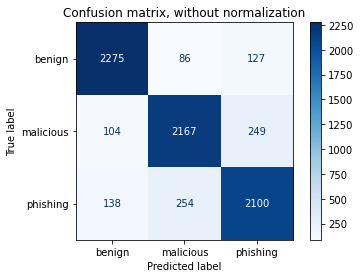

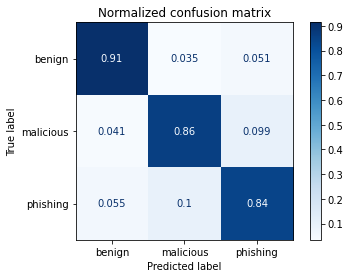

RandomForestClassifier
****Results****
Accuracy: 92.0133%
Log Loss: 0.2454499530843616
Confusion matrix, without normalization
[[2400   27   61]
 [  78 2229  213]
 [ 104  116 2272]]
Normalized confusion matrix
[[0.96463023 0.01085209 0.02451768]
 [0.03095238 0.88452381 0.08452381]
 [0.04173355 0.04654896 0.9117175 ]]


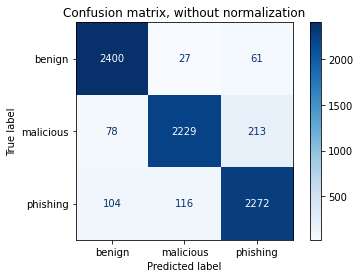

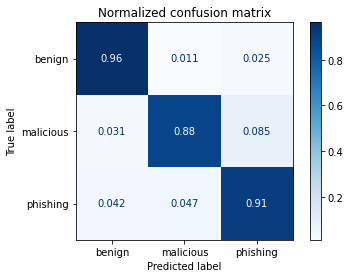

AdaBoostClassifier
****Results****
Accuracy: 82.0800%
Log Loss: 1.0160385684002897
Confusion matrix, without normalization
[[2224   83  181]
 [ 216 1972  332]
 [ 250  282 1960]]
Normalized confusion matrix
[[0.89389068 0.03336013 0.0727492 ]
 [0.08571429 0.78253968 0.13174603]
 [0.10032103 0.11316212 0.78651685]]


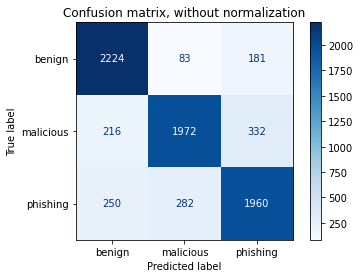

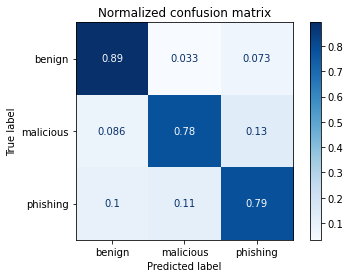

GradientBoostingClassifier
****Results****
Accuracy: 87.5867%
Log Loss: 0.3420057293687322
Confusion matrix, without normalization
[[2329   52  107]
 [ 167 2123  230]
 [ 199  176 2117]]
Normalized confusion matrix
[[0.93609325 0.02090032 0.04300643]
 [0.06626984 0.84246032 0.09126984]
 [0.07985554 0.070626   0.84951846]]


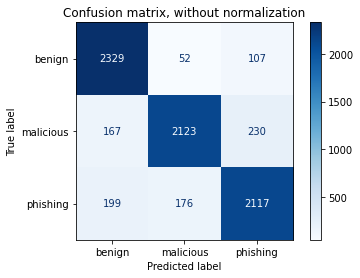

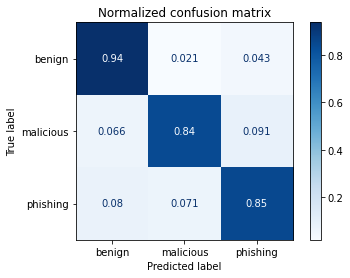

XGBClassifier
****Results****
Accuracy: 86.7600%
Log Loss: 0.3665992600907882
Confusion matrix, without normalization
[[2330   58  100]
 [ 195 2081  244]
 [ 220  176 2096]]
Normalized confusion matrix
[[0.93649518 0.0233119  0.04019293]
 [0.07738095 0.82579365 0.0968254 ]
 [0.0882825  0.070626   0.84109149]]


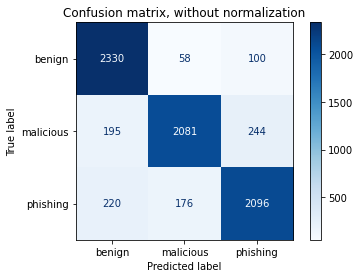

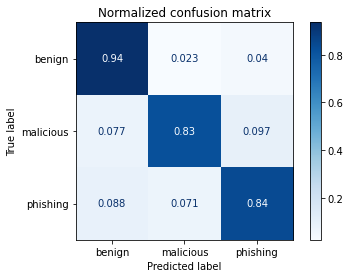

In [7]:
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from xgboost import XGBClassifier

# # With SVC, the multiclass problem is broken down to multiple binary classification cases, which is also called one-vs-one.
# https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(), 
    ]
#added log loss and charts based on this entry:
#https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)


for classifier in classifiers:
    name = classifier.__class__.__name__
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   

    #print("model score: %.3f" % pipe.score(X_test, y_test))

    print("="*30)
    print(name)
    print('****Results****')
    train_predictions = pipe.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = pipe.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)
    plt.show()
    
    
print("="*30)

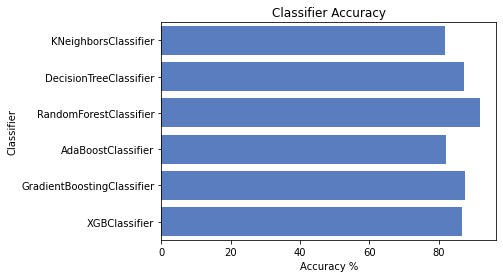

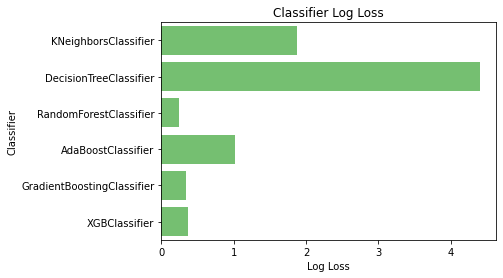

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

### 2. Random Forest - Parameter Tuning

#### A. Get a baseline accuracy score 

Using MinMax Scaler for preprocessing of numeric fields, and default parameters for Random Forest Classifier.

In [9]:
from sklearn.preprocessing import MinMaxScaler 

#Identifying feature type
numeric_features = df_model.select_dtypes(include=['int32', 'int64', 'float64']).columns

#Using ColumnTransformer to apply the transformations to the correct columns in the dataframe.
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

In [10]:
X = df_model.drop(['category'], axis=1)
y = df_model['category']

feat_labels = X.columns
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) 

In [11]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf)])

# Train the classifier
pipe.fit(X_train, y_train)

#https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('pc_domain_spec', 0.06635099293377751)
('pc_netloc_num', 0.05516846445136784)
('n_domain_suffix', 0.04285399323383795)
('n_domain_tok', 0.04948935351681041)
('pc_num', 0.04356066527573019)
('domain_entropy', 0.03945226608567416)
('path_entropy', 0.03648764717620508)
('netloc_entropy', 0.0602799077270583)
('pc_domain_num', 0.03199711919821299)
('n_netloc_tok', 0.01816671379404795)
('is_top500_domain', 0.024173953384021715)
('pc_uppercase', 0.041549398206699194)
('avg_path_token_len', 0.04826662158028875)
('pc_spec', 0.059901126151335055)
('longest_path_len', 0.048891785574939686)
('pc_path_uppercase', 0.03631580761980422)
('pc_netloc_spec', 0.05108374777074015)
('len_all_paths', 0.04502247052857698)
('len_domain', 0.032436345173403644)
('len_netloc', 0.07395240057233615)
('pc_path_num', 0.030689737199310996)
('entropy', 0.06390948284582121)


Accuracy: 92.7833%
Log Loss: 0.2224086869356732
Confusion matrix, without normalization
[[1913   19   47]
 [  55 1784  150]
 [  73   89 1870]]
Normalized confusion matrix
[[0.96664982 0.00960081 0.02374937]
 [0.02765209 0.89693313 0.07541478]
 [0.0359252  0.04379921 0.92027559]]


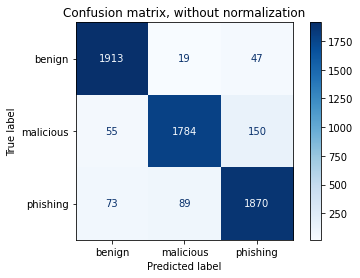

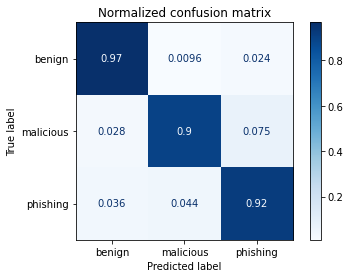

In [12]:
predictions = pipe.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Accuracy: {:.4%}".format(acc))
    
predictions = pipe.predict_proba(X_test)
ll = log_loss(y_test, predictions)
print("Log Loss: {}".format(ll))
    
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipe, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

RF Baseline scores
Accuracy - 92.783
Log Loss - 0.222
Confusion Matrix
Benign - 96.66%
Phishing - 92.02%
Malicious - 89.69%

We will try to improve these scores with parameter tuning.

The model’s performance only increases with the number of decision trees (num_estimators). As a result, we will tune this parameter after determining other relevant parameters (like max_depth, min_samples_leaf and min_samples_split) using GridSearchCV.

#### B. Find Best Parameters for Our Classifier

In [13]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

X = df_model.drop(['category'], axis=1)
y = df_model['category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(random_state=0, n_jobs=-1)

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('clf', clf)])

param_grid = {'clf__bootstrap': [True], 'clf__max_depth': [None, 5, 10, 20, 30], #setting this so as not to create a tree that's too big
    'clf__max_features': [2, 3, 4, 10],
    'clf__min_samples_leaf': [1, 3, 5, 10, 20, 50],
    'clf__min_samples_split': [2, 5, 10],
    'clf__n_estimators': [300]}                
                
rf_cv=GridSearchCV(pipe, param_grid, cv=3)
rf_cv.fit(X_train,y_train)

print("Best hpyerparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

Best hpyerparameters :(best parameters)  {'clf__bootstrap': True, 'clf__max_depth': 30, 'clf__max_features': 4, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 300}
accuracy : 0.9165416666666667


Next - Plugged in best parameters. Now just tuning number of estimators.

In [15]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

X = df_model.drop(['category'], axis=1)
y = df_model['category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(random_state=0, n_jobs=-1)

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('clf', clf)])

param_grid = {'clf__bootstrap': [True], 'clf__max_depth': [30],
    'clf__max_features': [4],
    'clf__min_samples_leaf': [1],
    'clf__min_samples_split': [2],
    'clf__n_estimators': [100, 300, 500, 800, 1200, 1500]}                
                
rf_cv=GridSearchCV(pipe, param_grid, cv=3)
rf_cv.fit(X_train,y_train)

print("Best hpyerparameters :(best parameters) ",rf_cv.best_params_)
print("accuracy :",rf_cv.best_score_)

Best hpyerparameters :(best parameters)  {'clf__bootstrap': True, 'clf__max_depth': 30, 'clf__max_features': 4, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 800}
accuracy : 0.9173749999999999


Next I'll use the best parameters along with cross-validation to evaluate how well I can maintain the accuracy score, using different partitions for training/testing.

#### C. Cross Validation

In [16]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.20)

from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=5)
clf = RandomForestClassifier(max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=800, n_jobs=-1)
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('clf', clf)])
results_kfold = model_selection.cross_val_score(pipe, X, y, cv=kfold)

print("Accuracy scores:",results_kfold)
print("Mean Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy scores: [0.91883333 0.935      0.825      0.87916667 0.81033333]
Mean Accuracy: 87.37%


### Final Random Forest Classifier Model & Prediction

In [7]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.preprocessing import MinMaxScaler 

#Identifying feature type
numeric_features = df_model.select_dtypes(include=['int32', 'int64', 'float64']).columns

#Using ColumnTransformer to apply the transformations to the correct columns in the dataframe.
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

In [9]:
# X -> features, y -> label 
X = df_model.drop(['category'], axis=1)
y = df_model['category']

feat_labels = X.columns

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

('pc_domain_spec', 0.06766748357696728)
('pc_netloc_num', 0.04900234512528537)
('n_domain_suffix', 0.03922690642650612)
('n_domain_tok', 0.04909564725713668)
('pc_num', 0.04579359378107634)
('domain_entropy', 0.04014871025972582)
('path_entropy', 0.03629773920077566)
('netloc_entropy', 0.06019662743498139)
('pc_domain_num', 0.032319701237800334)
('n_netloc_tok', 0.01904681008503561)
('is_top500_domain', 0.02407398866133967)
('pc_uppercase', 0.04161288328846473)
('avg_path_token_len', 0.04853764846361856)
('pc_spec', 0.060531750970826824)
('longest_path_len', 0.04945991629922611)
('pc_path_uppercase', 0.0369843283169122)
('pc_netloc_spec', 0.052211830149583235)
('len_all_paths', 0.04594733431564354)
('len_domain', 0.03332836408538743)
('len_netloc', 0.07395823235554068)
('pc_path_num', 0.030639033441800797)
('entropy', 0.06391912526636558)

Accuracy: 0.9220

Micro Precision: 0.9220
Micro Recall: 0.9220
Micro F1-score: 0.9220

Macro Precision: 0.9224
Macro Recall: 0.9222
Macro F1-score: 

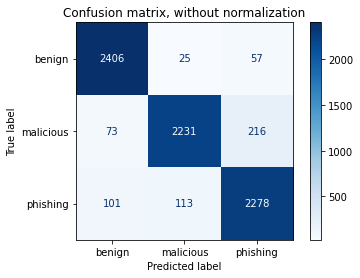

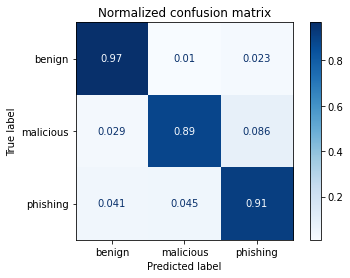

In [12]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score, classification_report


# Create a random forest classifier
clf = RandomForestClassifier(max_depth=30, max_features=4, min_samples_leaf=1, min_samples_split=2, n_estimators=800, n_jobs=-1)


pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf)])

# Train the classifier
pipe.fit(X_train, y_train)


# Train the classifier
#pipe.fit(X_train, y_train)

#https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/

# Print the name and gini importance of each feature
#for feature in zip(feat_labels, clf.feature_importances_):
#    print(feature)
    
#predictions = pipe.predict(X_test)
#acc = accuracy_score(y_test, predictions)
#print("Accuracy: {:.4%}".format(acc))
    
##predictions = pipe.predict_proba(X_test)
#ll = log_loss(y_test, predictions)
#print("Log Loss: {}".format(ll))
    
# Plot non-normalized confusion matrix
#titles_options = [("Confusion matrix, without normalization", None),
#                  ("Normalized confusion matrix", 'true')]
#for title, normalize in titles_options:
#    disp = plot_confusion_matrix(pipe, X_test, y_test,
#                                 cmap=plt.cm.Blues,
#                                 normalize=normalize)
#    disp.ax_.set_title(title)

#    print(title)
#    print(disp.confusion_matrix)
    
# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)
      
predictions = pipe.predict(X_test)

# print scores

print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, predictions)))

print('Micro Precision: {:.4f}'.format(precision_score(y_test, predictions, average='micro')))
print('Micro Recall: {:.4f}'.format(recall_score(y_test, predictions, average='micro')))
print('Micro F1-score: {:.4f}\n'.format(f1_score(y_test, predictions, average='micro')))

print('Macro Precision: {:.4f}'.format(precision_score(y_test, predictions, average='macro')))
print('Macro Recall: {:.4f}'.format(recall_score(y_test, predictions, average='macro')))
print('Macro F1-score: {:.4f}\n'.format(f1_score(y_test, predictions, average='macro')))

print('Weighted Precision: {:.4f}'.format(precision_score(y_test, predictions, average='weighted')))
print('Weighted Recall: {:.4f}'.format(recall_score(y_test, predictions, average='weighted')))
print('Weighted F1-score: {:.4f}'.format(f1_score(y_test, predictions, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, predictions, target_names=['Benign', 'Phishing', 'Malicious'], digits=4))
    
# Plot confusion matrixes
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [13]:
# Print the name and gini importance of each feature

feature_importance = []

for feature in zip(feat_labels, clf.feature_importances_):
    feature_importance.append(feature)
    
# take the second element for sort
def take_second(elem):
    return elem[1]

# sort list with key
sorted_feature_importance = sorted(feature_importance, key=take_second, reverse=True)[:20]

# print list
print('Feature Importance - Top 20:')
for i in sorted_feature_importance:
    print(i)

Feature Importance - Top 20:
('len_netloc', 0.07395823235554068)
('pc_domain_spec', 0.06766748357696728)
('entropy', 0.06391912526636558)
('pc_spec', 0.060531750970826824)
('netloc_entropy', 0.06019662743498139)
('pc_netloc_spec', 0.052211830149583235)
('longest_path_len', 0.04945991629922611)
('n_domain_tok', 0.04909564725713668)
('pc_netloc_num', 0.04900234512528537)
('avg_path_token_len', 0.04853764846361856)
('len_all_paths', 0.04594733431564354)
('pc_num', 0.04579359378107634)
('pc_uppercase', 0.04161288328846473)
('domain_entropy', 0.04014871025972582)
('n_domain_suffix', 0.03922690642650612)
('pc_path_uppercase', 0.0369843283169122)
('path_entropy', 0.03629773920077566)
('len_domain', 0.03332836408538743)
('pc_domain_num', 0.032319701237800334)
('pc_path_num', 0.030639033441800797)


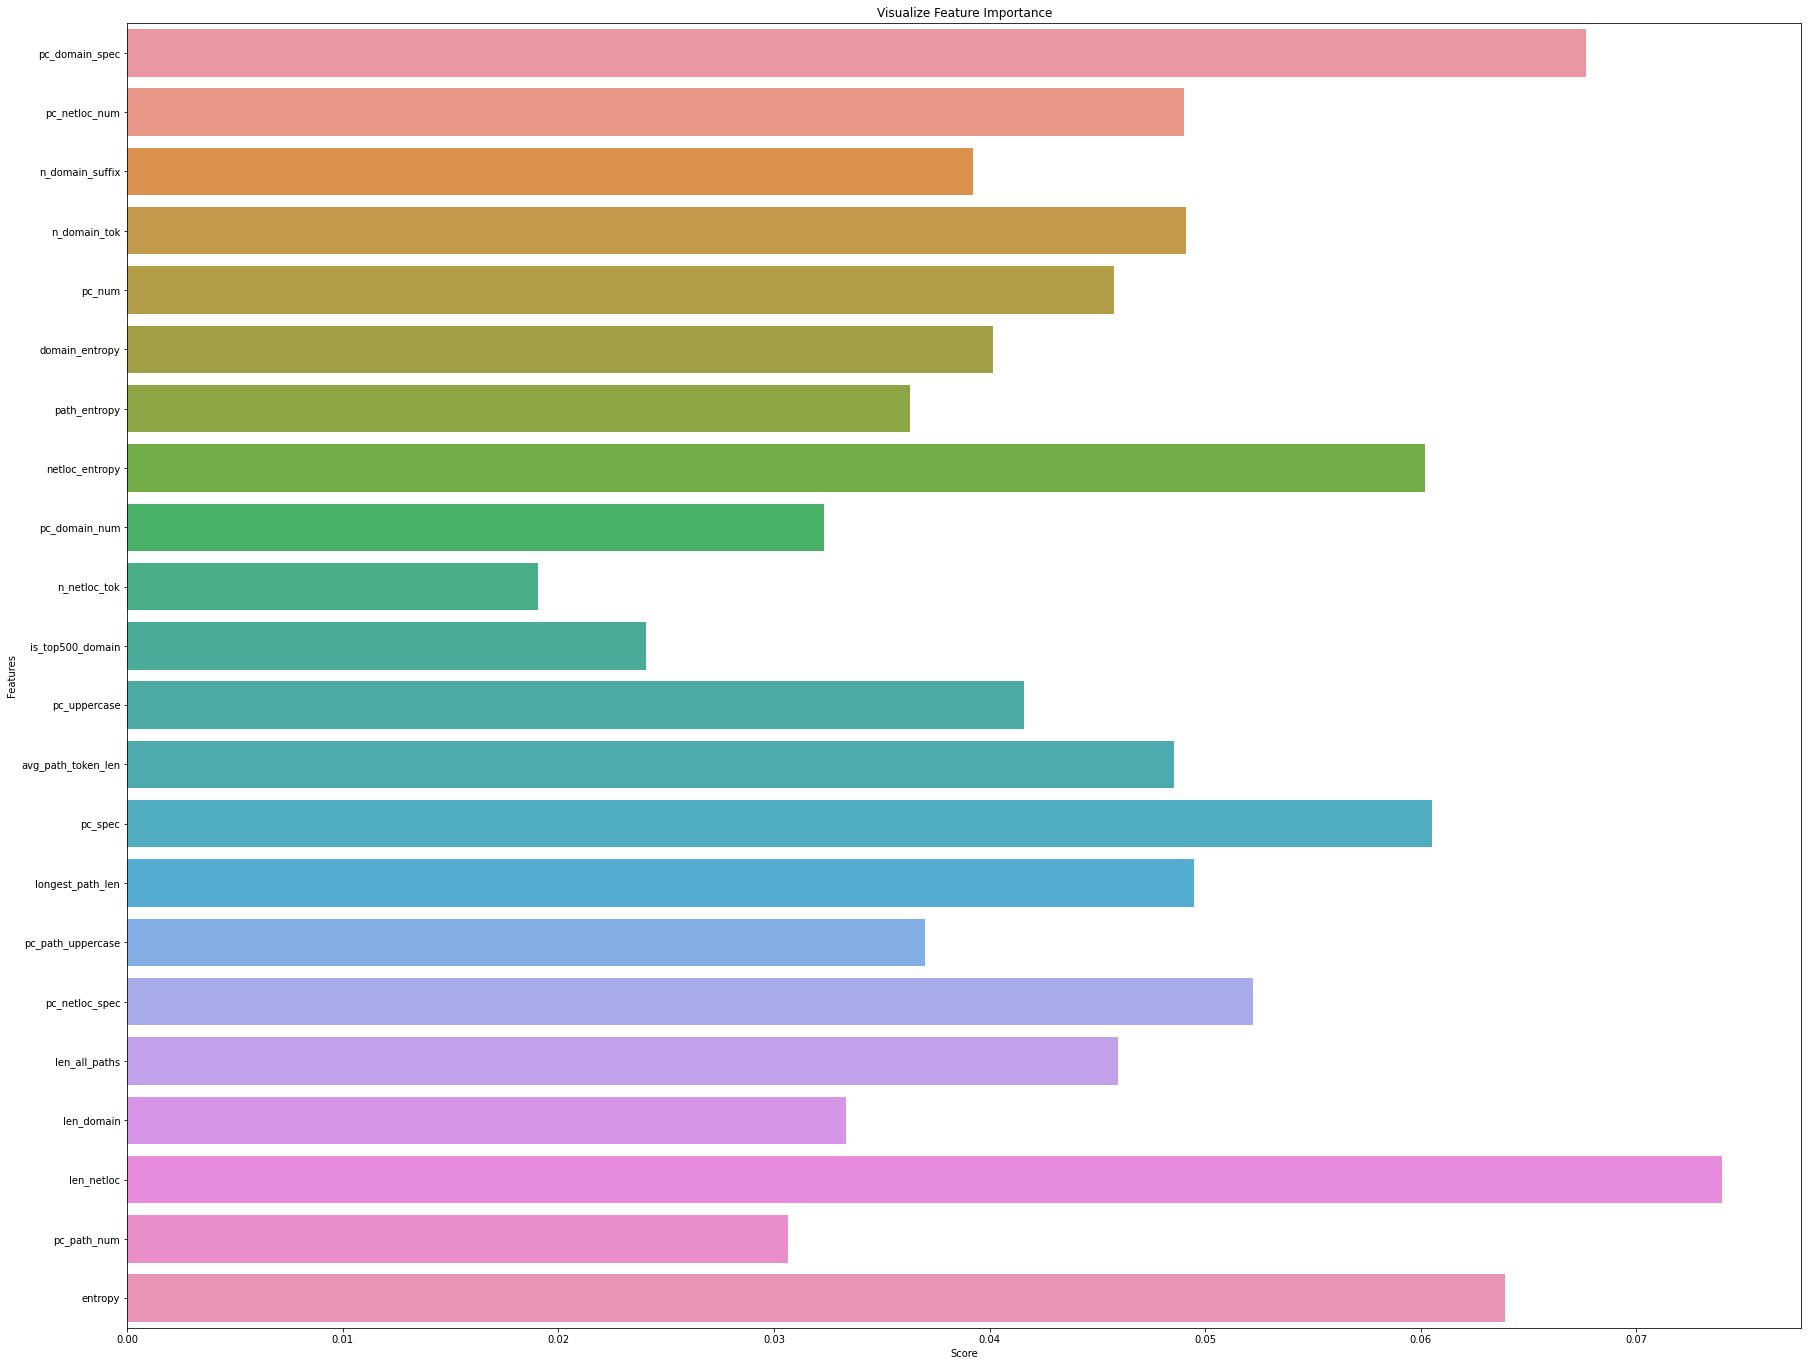

In [14]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=clf.feature_importances_, y=feat_labels)
ax.set_title("Visualize Feature Importance")
ax.set_yticklabels(feat_labels)
ax.set_xlabel("Score")
ax.set_ylabel("Features")
plt.show()

#feat_labels, clf.feature_importances_